In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("esports_data.csv")
data.head()

,record_id,player_id,team_name,player_role,map_played,match_type,kills,assists,deaths,accuracy_percent,reaction_time_ms,fatigue_index,performance_score,win_probability,match_outcome,mvp_award
0,1,160,Titan Esports,Flex,Dust Arena,Playoff,18,6,7,40.43,192.28,0.52,50.02,0.83,Win,No
1,2,2,Titan Esports,Support,Neon City,Final,16,7,11,40.50,201.98,0.68,41.45,0.89,Win,No
2,3,468,Team Alpha,Support,Neon City,Semi-Final,14,7,15,36.93,172.50,0.27,35.77,0.81,Win,No
3,4,447,Team Nova,IGL,Desert Storm,Final,12,6,13,53.46,246.83,0.07,43.03,1.00,Win,No
4,5,196,Phantom Squad,Sniper,Skyline,Playoff,13,9,13,44.71,266.94,0.52,39.16,0.85,Win,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          2800 non-null   int64  
 1   player_id          2800 non-null   int64  
 2   team_name          2800 non-null   object 
 3   player_role        2800 non-null   object 
 4   map_played         2800 non-null   object 
 5   match_type         2800 non-null   object 
 6   kills              2800 non-null   int64  
 7   assists            2800 non-null   int64  
 8   deaths             2800 non-null   int64  
 9   accuracy_percent   2800 non-null   float64
 10  reaction_time_ms   2800 non-null   float64
 11  fatigue_index      2800 non-null   float64
 12  performance_score  2800 non-null   float64
 13  win_probability    2800 non-null   float64
 14  match_outcome      2800 non-null   object 
 15  mvp_award          2800 non-null   object 
dtypes: float64(5), int64(5),

In [4]:
data.describe()

,record_id,player_id,kills,assists,deaths,accuracy_percent,reaction_time_ms,fatigue_index,performance_score,win_probability
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,247.968214,14.872500,8.027857,10.025000,45.095225,220.129836,0.498875,45.306718,0.916364
std,808.434702,144.472383,3.973451,2.843157,3.178069,8.054907,30.240196,0.291618,10.333504,0.097468
min,1.000000,1.000000,4.000000,0.000000,1.000000,20.460000,118.730000,0.000000,16.580000,0.470000
25%,700.750000,121.000000,12.000000,6.000000,8.000000,39.542500,199.762500,0.240000,38.287500,0.860000
50%,1400.500000,248.000000,15.000000,8.000000,10.000000,44.960000,220.685000,0.500000,44.985000,0.950000
75%,2100.250000,371.000000,18.000000,10.000000,12.000000,50.552500,240.452500,0.760000,52.302500,1.000000
max,2800.000000,500.000000,30.000000,20.000000,22.000000,71.790000,324.110000,1.000000,87.360000,1.000000


In [5]:
data.isnull().sum()

record_id            0
player_id            0
team_name            0
player_role          0
map_played           0
match_type           0
kills                0
assists              0
deaths               0
accuracy_percent     0
reaction_time_ms     0
fatigue_index        0
performance_score    0
win_probability      0
match_outcome        0
mvp_award            0
dtype: int64

In [6]:
data = data.drop_duplicates()

# Which player has the highest average score?

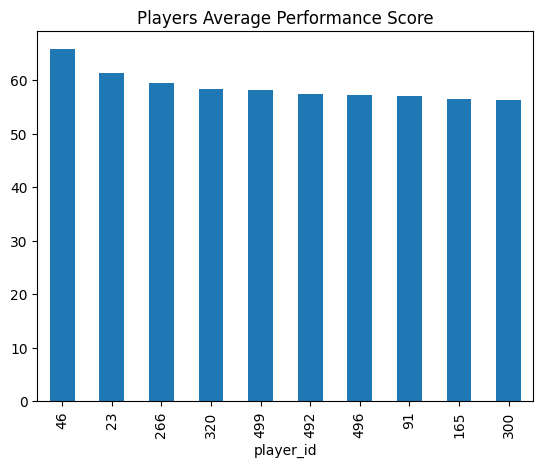

In [7]:
player_avg_performance=data.groupby(['player_id'])['performance_score'].mean().sort_values(ascending=False).head(10)
player_avg_performance.plot(kind='bar')
plt.title("Players Average Performance Score")
plt.show()

# Which team played the most matches?

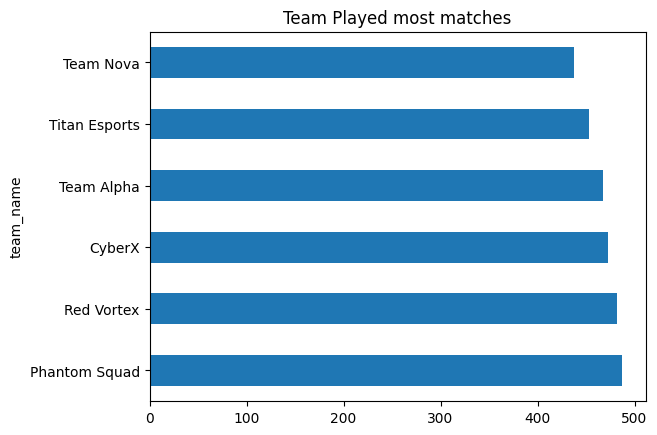

In [8]:
most_matches=data.groupby(['team_name'])['player_id'].count().sort_values(ascending=False)
most_matches.plot(kind='barh')
plt.title("Team Played most matches")
plt.show()

# Which player role has the highest average performance score?

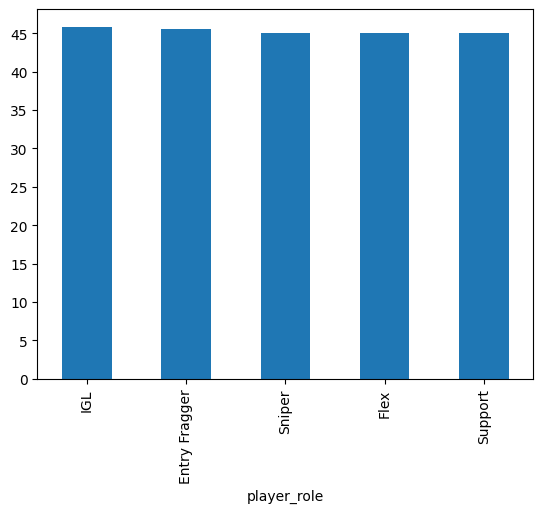

In [9]:
player_role_score=data.groupby(['player_role'])['performance_score'].mean().sort_values(ascending=False).head(10)
player_role_score.plot(kind='bar')
plt.yticks(
    np.arange(0, player_role_score.max() + 1, 5)  # step = 5 (change as needed)
)
plt.show()

# Does match type affect win probability?

In [10]:
data.groupby(['match_type'])['win_probability'].mean()

match_type
Final          0.920912
Group Stage    0.916995
Playoff        0.911058
Qualifier      0.911571
Semi-Final     0.920890
Name: win_probability, dtype: float64

# What is the relationship between kills and performance score?

In [11]:
data[['kills','performance_score']].corr()

,kills,performance_score
kills,1.000000,0.767174
performance_score,0.767174,1.000000


In [12]:
# Which factors most influence win probability?


corr=data[['kills', 'assists', 'deaths',
     'accuracy_percent', 'reaction_time_ms',
     'fatigue_index', 'performance_score',
     'win_probability']].corr()
corr['win_probability'].sort_values(ascending=False)

win_probability      1.000000
performance_score    0.639340
kills                0.481693
accuracy_percent     0.268588
assists              0.182393
reaction_time_ms    -0.018460
deaths              -0.169460
fatigue_index       -0.219400
Name: win_probability, dtype: float64

# Are MVP players actually better performers?

In [13]:
mvp=data[data['mvp_award']=='Yes']
mvp.groupby(['player_id'])['performance_score'].mean().sort_values(ascending=False).head(10)

player_id
391    77.02
434    76.59
266    75.94
460    75.92
58     75.86
330    75.16
208    73.47
312    73.31
10     73.27
354    73.15
Name: performance_score, dtype: float64

In [14]:
data.groupby(['mvp_award'])['performance_score'].mean()

mvp_award
No     43.522991
Yes    64.420209
Name: performance_score, dtype: float64

In [15]:
data.groupby('mvp_award')['performance_score'].agg(['mean', 'median', 'std'])

,mean,median,std
mvp_award,,,
No,43.522991,43.78,8.823059
Yes,64.420209,63.26,4.167224


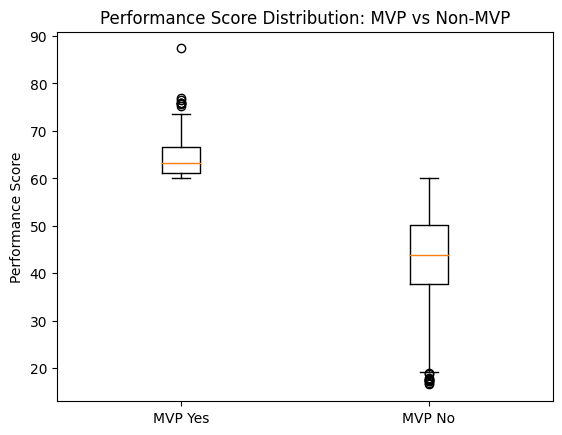

In [16]:
import matplotlib.pyplot as plt

mvp_yes = data[data['mvp_award'] == 'Yes']['performance_score']
mvp_no = data[data['mvp_award'] == 'No']['performance_score']

plt.boxplot([mvp_yes, mvp_no], labels=['MVP Yes', 'MVP No'])
plt.title("Performance Score Distribution: MVP vs Non-MVP")
plt.ylabel("Performance Score")
plt.show()

# Identify elite players (Top 10%) based on performance score

In [17]:
# data.groupby(['player_id'])['performance_score'].mean().sort_values(ascending=False).head(10)
threshold=data['performance_score'].quantile(0.90)
elite_player=data[data['performance_score']>=threshold]
elite_player[['player_id','team_name','performance_score']].sort_values('performance_score',ascending=False).head(10)

,player_id,team_name,performance_score
2237,266,Red Vortex,87.36
991,391,Team Nova,77.02
1361,434,Team Alpha,76.59
2233,460,Red Vortex,75.92
1725,58,Red Vortex,75.86
1027,340,CyberX,75.77
2039,309,Red Vortex,75.70
613,330,Phantom Squad,75.16
1203,208,Team Nova,73.47
2678,312,Team Alpha,73.31


# Which map produces the highest average performance?

In [18]:
data.groupby(['map_played'])['performance_score'].mean().sort_values(ascending=False)

map_played
Dust Arena      45.829599
Frozen Base     45.426047
Neon City       45.325243
Desert Storm    45.074623
Skyline         44.848588
Name: performance_score, dtype: float64

# Which team has the highest win probability on average?

In [19]:
pivot_df = pd.pivot_table(
    data,
    index='map_played',          # row heading
    columns='team_name',         # column heading
    values='win_probability',  # values to show
    aggfunc='mean' # aggregation (important)
)

pivot_df

team_name,CyberX,Phantom Squad,Red Vortex,Team Alpha,Team Nova,Titan Esports
map_played,,,,,,
Desert Storm,0.931613,0.910101,0.921622,0.925385,0.916705,0.915955
Dust Arena,0.919623,0.925281,0.910645,0.905591,0.925816,0.922234
Frozen Base,0.924935,0.939904,0.922258,0.900303,0.933298,0.899024
Neon City,0.896571,0.917981,0.919063,0.910102,0.934024,0.906044
Skyline,0.930435,0.904835,0.914944,0.906395,0.900000,0.898041


# Create a custom performance efficiency metric

In [22]:
data['efficiency_score']=((data['kills']+data['assists'])/data['deaths']+1)*(1-data['fatigue_index'])
data['efficiency_score'].head(10)

0    2.125714
1    0.989091
2    1.752000
3    2.217692
4    1.292308
5    0.625000
6    2.112000
7    2.580000
8    3.920000
9    0.350000
Name: efficiency_score, dtype: float64

# Which role produces the most MVPs?

In [23]:
data.head()

,record_id,player_id,team_name,player_role,map_played,match_type,kills,assists,deaths,accuracy_percent,reaction_time_ms,fatigue_index,performance_score,win_probability,match_outcome,mvp_award,efficiency_score
0,1,160,Titan Esports,Flex,Dust Arena,Playoff,18,6,7,40.43,192.28,0.52,50.02,0.83,Win,No,2.125714
1,2,2,Titan Esports,Support,Neon City,Final,16,7,11,40.50,201.98,0.68,41.45,0.89,Win,No,0.989091
2,3,468,Team Alpha,Support,Neon City,Semi-Final,14,7,15,36.93,172.50,0.27,35.77,0.81,Win,No,1.752000
3,4,447,Team Nova,IGL,Desert Storm,Final,12,6,13,53.46,246.83,0.07,43.03,1.00,Win,No,2.217692
4,5,196,Phantom Squad,Sniper,Skyline,Playoff,13,9,13,44.71,266.94,0.52,39.16,0.85,Win,No,1.292308


In [24]:
most_mvp=data[data['mvp_award']=='Yes']
most_mvp.groupby(['player_role'])['mvp_award'].count()

player_role
Entry Fragger    60
Flex             45
IGL              56
Sniper           42
Support          36
Name: mvp_award, dtype: int64